In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('C:\\Users\\SHREY\\Downloads\\E-commerce_dataset.xlsx')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [4]:
data.shape

(51290, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             51290 non-null  int64         
 1   Order ID           51290 non-null  object        
 2   Order Date         51290 non-null  datetime64[ns]
 3   Customer ID        51290 non-null  object        
 4   Segment            51290 non-null  object        
 5   City               51290 non-null  object        
 6   State              51290 non-null  object        
 7   Country            51290 non-null  object        
 8   Country latitude   51290 non-null  float64       
 9   Country longitude  51290 non-null  float64       
 10  Region             51290 non-null  object        
 11  Market             51290 non-null  object        
 12  Subcategory        51290 non-null  object        
 13  Category           51290 non-null  object        
 14  Produc

In [6]:
data.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64

In [7]:
data.duplicated('Row ID').sum()

0

In [8]:
data['Segment'].value_counts()

Consumer         26518
Corporate        15429
Self-Employed     9343
Name: Segment, dtype: int64

In [9]:
data['Region'].value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [10]:
data['Region']=data['Region'].replace('Canada','North America')
data['Region']=data['Region'].replace('Western US','North America')
data['Region']=data['Region'].replace('Central US','North America')
data['Region']=data['Region'].replace('Southern US','North America')
data['Region']=data['Region'].replace('Eastern US','North America')

In [11]:
data['Region'].value_counts()

North America        10378
Western Europe        5883
Central America       5616
Oceania               3487
Southeastern Asia     3129
South America         2988
Southern Asia         2655
Western Asia          2440
Eastern Asia          2374
Northern Europe       2204
Southern Europe       2113
Caribbean             1690
Eastern Europe        1529
Western Africa        1460
North Africa          1278
Eastern Africa         728
Central Africa         643
Southern Africa        478
Central Asia           217
Name: Region, dtype: int64

In [12]:
data.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [13]:
data['Market'].value_counts()

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

In [14]:
data['Subcategory'].value_counts()

Nail care products              6146
shampoos and conditioners       5049
Eye shadows and pencils         4864
face moisturizing products      3492
vitamins and supplements        3434
brushes and applicators         3357
hair colors and toners          3154
Accessories                     3075
hand creams                     2601
body moisturizers               2601
foundations and concealers      2411
face masks and exfoliators      2407
bath oils, bubbles and soaks    2387
candles, sprays, diffusers      2223
Lipsticks                       1742
Body soaps and washes           1486
fragrances                       861
Name: Subcategory, dtype: int64

In [15]:
data['Category'].value_counts()

Body care               21062
Home and Accessories     9516
Make up                  9017
Hair care                8203
Face care                3492
Name: Category, dtype: int64

In [16]:
data['Discount'].value_counts()

0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.002      461
0.150      459
0.270      388
0.300      340
0.450      325
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.150       82
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
0.450        2
Name: Discount, dtype: int64

In [17]:
data.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [18]:
data.describe()

,Row ID,Country latitude,Country longitude,Quantity,Sales,Discount,Profit
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346
std,14806.29199,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680
min,1.00000,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000
25%,12823.25000,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000
50%,25645.50000,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000
75%,38467.75000,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000
max,51290.00000,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000


In [19]:
data['Order Date'].describe()

C:\Users\SHREY\AppData\Local\Temp\ipykernel_8332\3567578949.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Order Date'].describe()


count                   51290
unique                   1430
top       2023-06-18 00:00:00
freq                      135
first     2020-01-01 00:00:00
last      2023-12-31 00:00:00
Name: Order Date, dtype: object

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

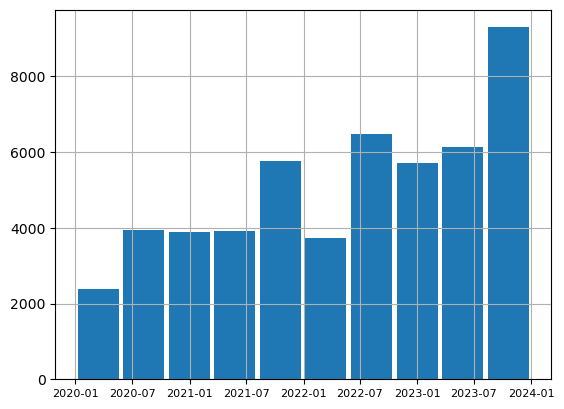

In [20]:
data['Order Date'].hist(rwidth=0.9)
plt.xticks(fontsize=8)

<Axes: >

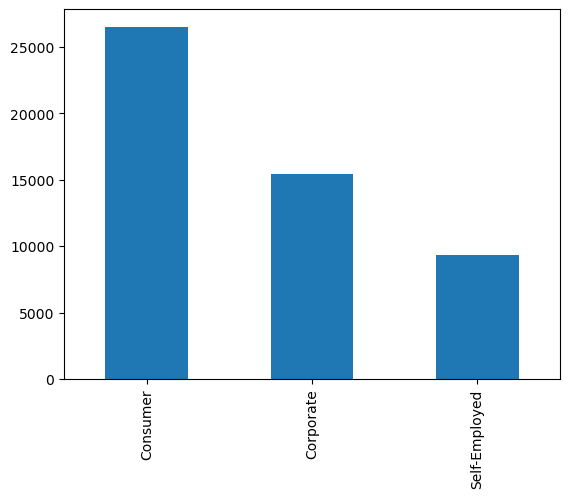

In [21]:
data['Segment'].value_counts().plot(kind='bar')

In [22]:
data['City'].describe()

count             51290
unique             3650
top       New York City
freq                915
Name: City, dtype: object

In [23]:
data['State'].describe()

count          51290
unique          1102
top       California
freq            2001
Name: State, dtype: object

In [24]:
data['Country'].describe()

count             51290
unique              164
top       United States
freq               9994
Name: Country, dtype: object

In [25]:
data['City'].describe()

count             51290
unique             3650
top       New York City
freq                915
Name: City, dtype: object

<Axes: >

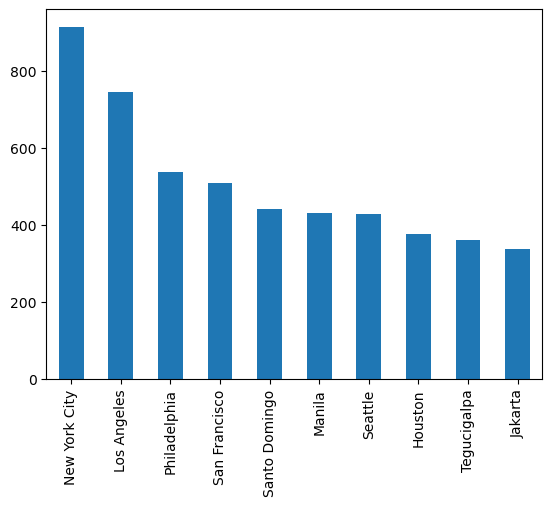

In [26]:
d_city=data['City'].value_counts().sort_values(ascending=False).head(10)
d_city.plot(kind='bar')

<Axes: >

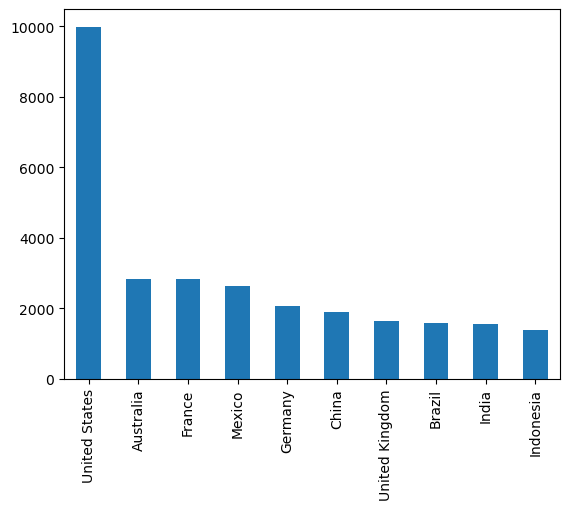

In [27]:
d_country=data['Country'].value_counts().sort_values(ascending=False).head(10)
d_country.plot(kind='bar')

<Axes: >

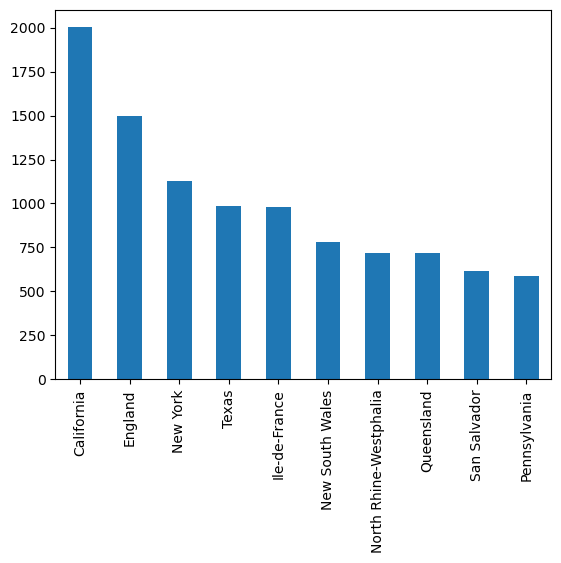

In [28]:
d_state=data['State'].value_counts().sort_values(ascending=False).head(10)
d_state.plot(kind='bar')

In [29]:
data.drop(columns=['Country latitude'], inplace=True)
data.drop(columns=['Country longitude'], inplace=True)

In [30]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Region', 'Market', 'Subcategory', 'Category',
       'Product', 'Quantity', 'Sales', 'Discount', 'Profit'],
      dtype='object')

In [31]:
data['Region'].describe()

count             51290
unique               19
top       North America
freq              10378
Name: Region, dtype: object

<Axes: >

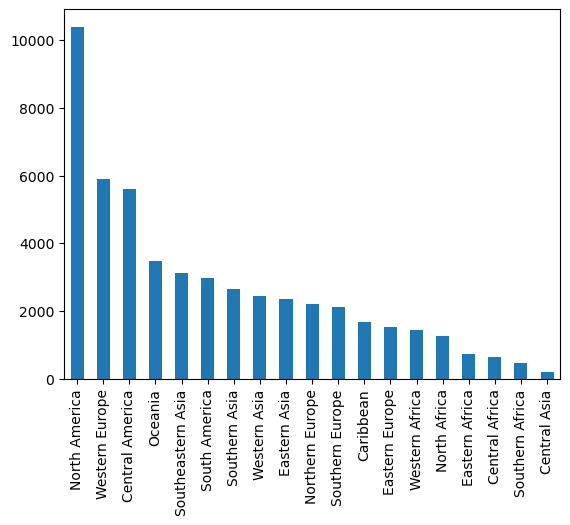

In [32]:
data['Region'].value_counts().plot(kind='bar')


In [33]:
data['Market'].describe()

count            51290
unique               5
top       Asia Pacific
freq             14302
Name: Market, dtype: object

<Axes: >

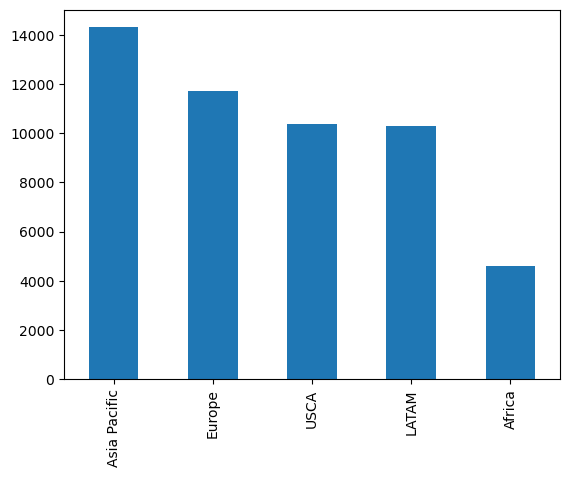

In [34]:
data['Market'].value_counts().plot(kind='bar')

In [35]:
data['Subcategory'].describe()

count                  51290
unique                    17
top       Nail care products
freq                    6146
Name: Subcategory, dtype: object

<Axes: >

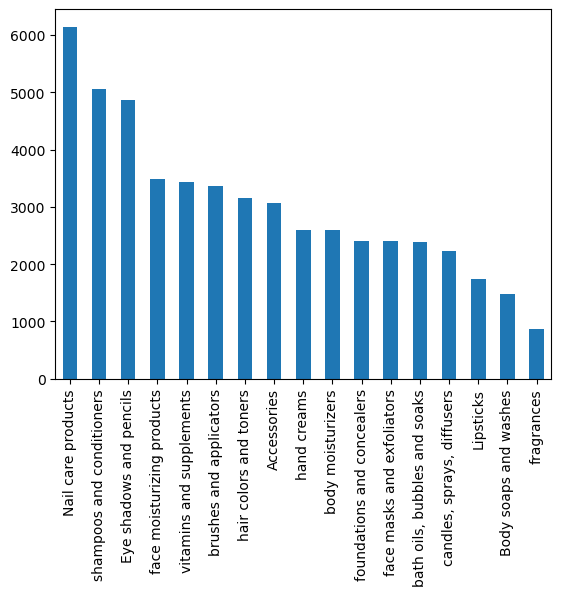

In [36]:
data['Subcategory'].value_counts().plot(kind='bar')

In [37]:
data['Category'].describe()

count         51290
unique            5
top       Body care
freq          21062
Name: Category, dtype: object

<Axes: >

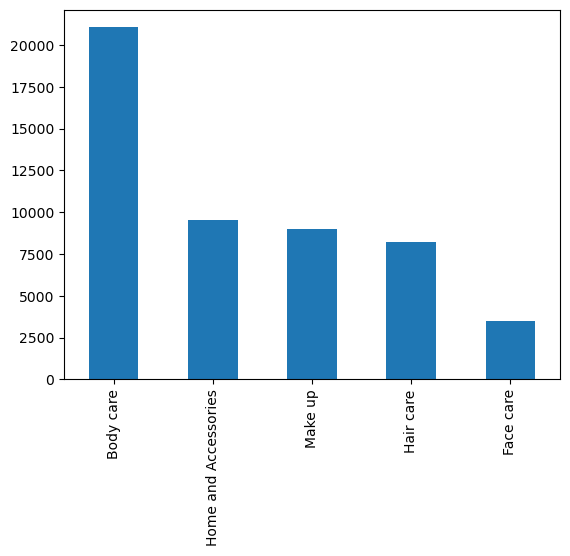

In [38]:
data['Category'].value_counts().plot(kind='bar')

In [39]:
data['Product'].describe()

count                   51290
unique                   3577
top       Herbal Essences Bio
freq                      335
Name: Product, dtype: object

<Axes: >

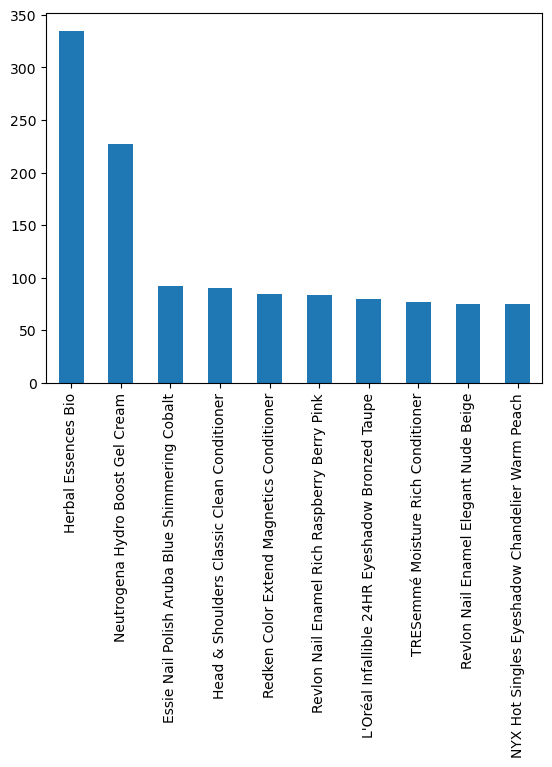

In [40]:
d_product=data['Product'].value_counts().sort_values(ascending=False).head(10)
d_product.plot(kind='bar')

<Axes: >

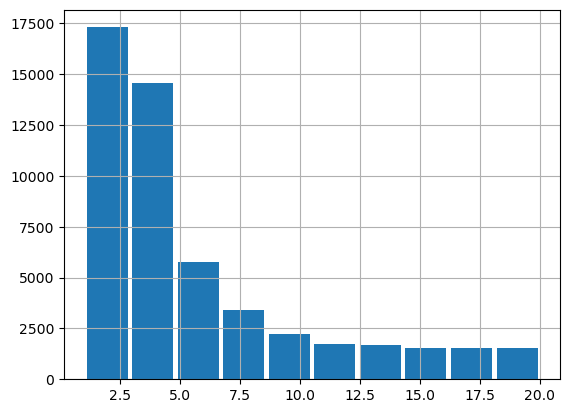

In [41]:
data['Quantity'].hist(rwidth=0.9)

<Axes: >

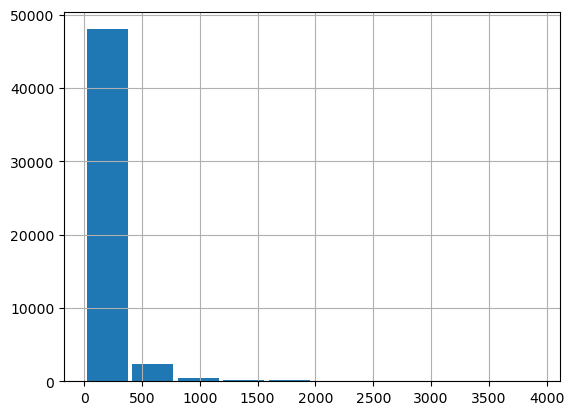

In [78]:
data['Sales'].hist(rwidth=0.9)

<Axes: >

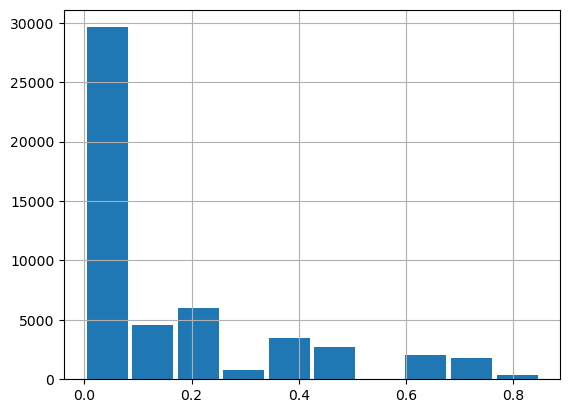

In [43]:
data['Discount'].hist(rwidth=0.9)

<Axes: >

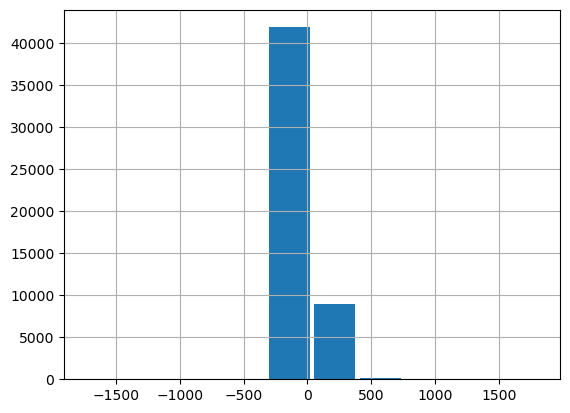

In [44]:
data['Profit'].hist(rwidth=0.9)

In [45]:
region_sales=data.groupby('Region')['Sales'].sum()
region_sales

Region
Caribbean             222316
Central Africa         68211
Central America       729231
Central Asia           22797
Eastern Africa         87233
Eastern Asia          326237
Eastern Europe        165257
North Africa          118575
North America        1372045
Northern Europe       264257
Oceania               454304
South America         388179
Southeastern Asia     423768
Southern Africa        51562
Southern Asia         329088
Southern Europe       295075
Western Africa        161230
Western Asia          275454
Western Europe        762855
Name: Sales, dtype: int64

<Axes: xlabel='Region'>

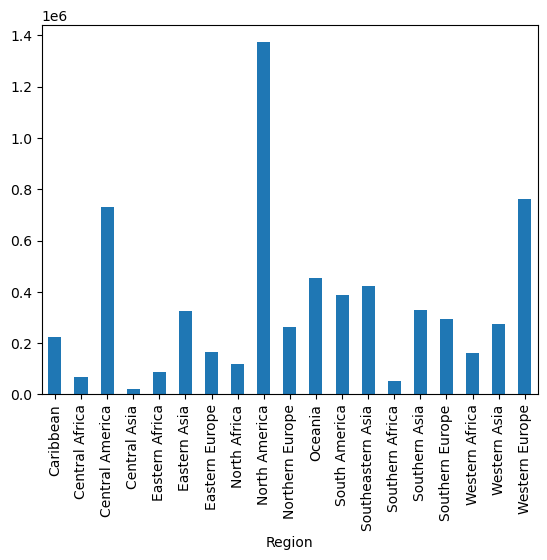

In [46]:
region_sales.plot(kind='bar')

In [47]:
region_profit=data.groupby('Region')['Profit'].sum()
region_profit

Region
Caribbean             35426.684
Central Africa        20909.350
Central America      139019.038
Central Asia          -4029.800
Eastern Africa        15526.650
Eastern Asia          86461.700
Eastern Europe        52954.450
North Africa          38399.500
North America        222770.120
Northern Europe       42125.100
Oceania               68887.150
South America         41597.068
Southeastern Asia      7079.090
Southern Africa       16473.100
Southern Asia         84910.950
Southern Europe       65051.850
Western Africa       -25095.150
Western Asia         -14566.500
Western Europe       171513.300
Name: Profit, dtype: float64

<Axes: xlabel='Region'>

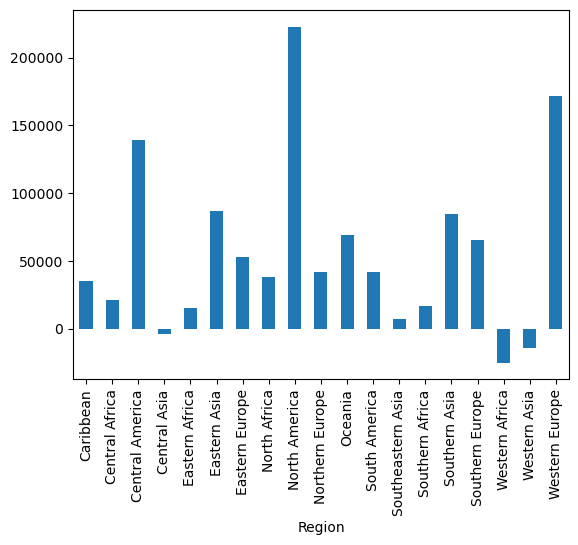

In [48]:
region_profit.plot(kind='bar')

In [49]:
region_discount=data.groupby('Region')['Discount'].mean()
region_discount

Region
Caribbean            0.135751
Central Africa       0.000000
Central America      0.109767
Central Asia         0.416129
Eastern Africa       0.117170
Eastern Asia         0.047978
Eastern Europe       0.000000
North Africa         0.000000
North America        0.150423
Northern Europe      0.150499
Oceania              0.153169
South America        0.183831
Southeastern Asia    0.272077
Southern Africa      0.000000
Southern Asia        0.052053
Southern Europe      0.095883
Western Africa       0.433904
Western Asia         0.352787
Western Europe       0.090388
Name: Discount, dtype: float64

<Axes: xlabel='Region'>

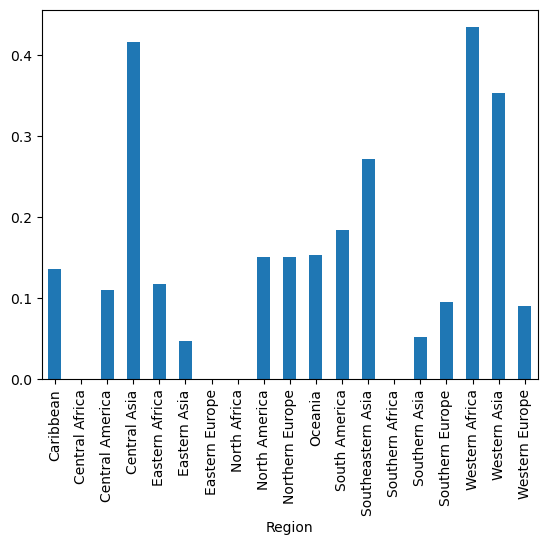

In [50]:
region_discount.plot(kind='bar')

In [51]:
region_quantity=data.groupby('Region')['Quantity'].sum()
region_quantity

Region
Caribbean             9257
Central Africa        2880
Central America      30967
Central Asia           998
Eastern Africa        3559
Eastern Asia         13245
Eastern Europe        7189
North Africa          5709
North America        57709
Northern Europe      12629
Oceania              19356
South America        16125
Southeastern Asia    17477
Southern Africa       2472
Southern Asia        14466
Southern Europe      11994
Western Africa        6816
Western Asia         12086
Western Europe       32844
Name: Quantity, dtype: int64

<Axes: xlabel='Region'>

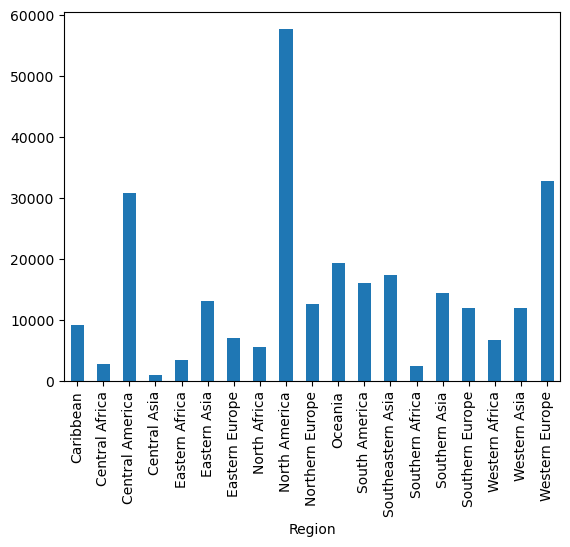

In [52]:
region_quantity.plot(kind='bar')

In [53]:
category_sales=data.groupby('Category')['Sales'].sum()
category_sales

Category
Body care               2682942
Face care                445716
Hair care               1022151
Home and Accessories    1245643
Make up                 1121222
Name: Sales, dtype: int64

<Axes: ylabel='Sales'>

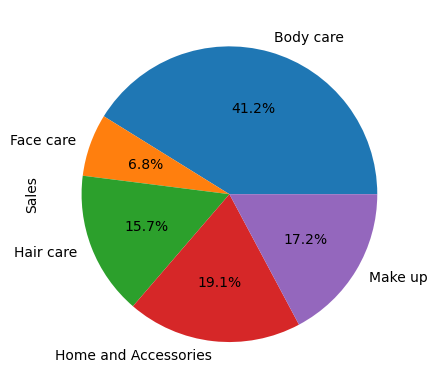

In [54]:
category_sales.plot(kind='pie', autopct='%1.1f%%')

In [55]:
category_profit=data.groupby('Category')['Profit'].sum()
category_profit

Category
Body care               590907.78
Face care               159018.10
Hair care                 3677.23
Home and Accessories    -57187.64
Make up                 368998.18
Name: Profit, dtype: float64

<Axes: xlabel='Category'>

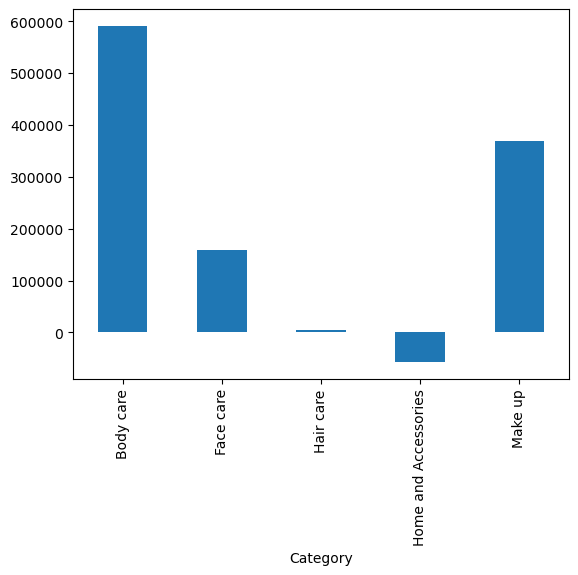

In [56]:
category_profit.plot(kind='bar')

In [57]:
category_discount=data.groupby('Category')['Discount'].mean()
category_discount

Category
Body care               0.152395
Face care               0.110109
Hair care               0.143188
Home and Accessories    0.144055
Make up                 0.131983
Name: Discount, dtype: float64

<Axes: xlabel='Category'>

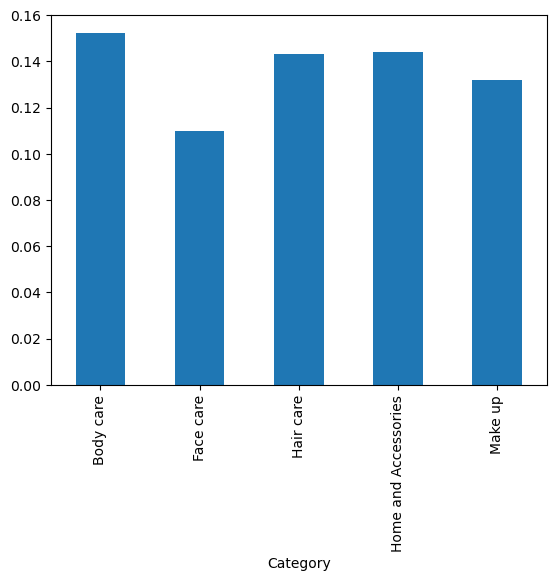

In [58]:
category_discount.plot(kind='bar')

In [59]:
subcategory_sales=data.groupby(['Category','Subcategory'])['Sales'].sum()
subcategory_sales

Category              Subcategory                 
Body care             Body soaps and washes           159748
                      Nail care products              787587
                      bath oils, bubbles and soaks    295340
                      body moisturizers               340944
                      face masks and exfoliators      314972
                      hand creams                     338474
                      vitamins and supplements        445877
Face care             face moisturizing products      445716
Hair care             hair colors and toners          403184
                      shampoos and conditioners       618967
Home and Accessories  Accessories                     396608
                      brushes and applicators         447605
                      candles, sprays, diffusers      277899
                      fragrances                      123531
Make up               Eye shadows and pencils         604511
                      Lipsticks   

<Axes: xlabel='Category,Subcategory'>

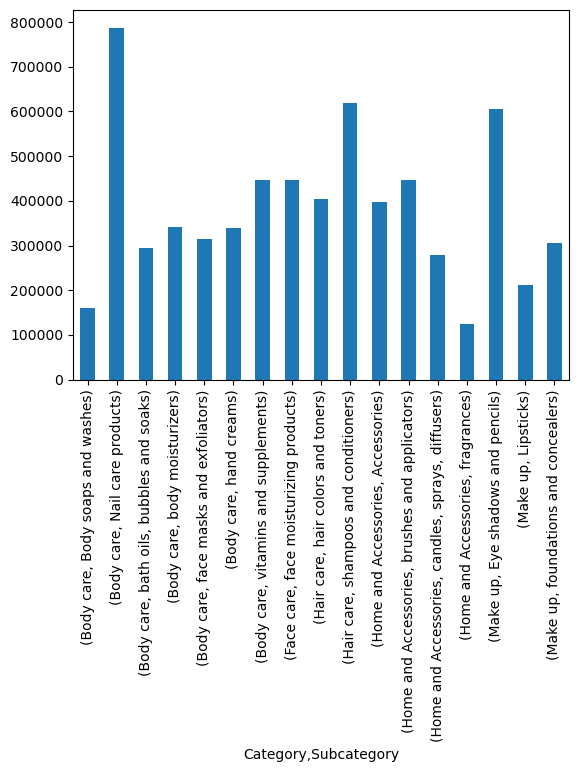

In [60]:
subcategory_sales.plot(kind='bar')

In [61]:
subcategory_profit=data.groupby(['Category','Subcategory'])['Profit'].sum()
subcategory_profit

Category              Subcategory                 
Body care             Body soaps and washes            47532.83
                      Nail care products              223684.09
                      bath oils, bubbles and soaks     99583.15
                      body moisturizers               -18237.92
                      face masks and exfoliators       -9815.90
                      hand creams                     113138.41
                      vitamins and supplements        135023.12
Face care             face moisturizing products      159018.10
Hair care             hair colors and toners             552.71
                      shampoos and conditioners         3124.52
Home and Accessories  Accessories                      -4099.50
                      brushes and applicators         -21710.61
                      candles, sprays, diffusers       -4637.41
                      fragrances                      -26740.12
Make up               Eye shadows and pencils        

<Axes: xlabel='Category,Subcategory'>

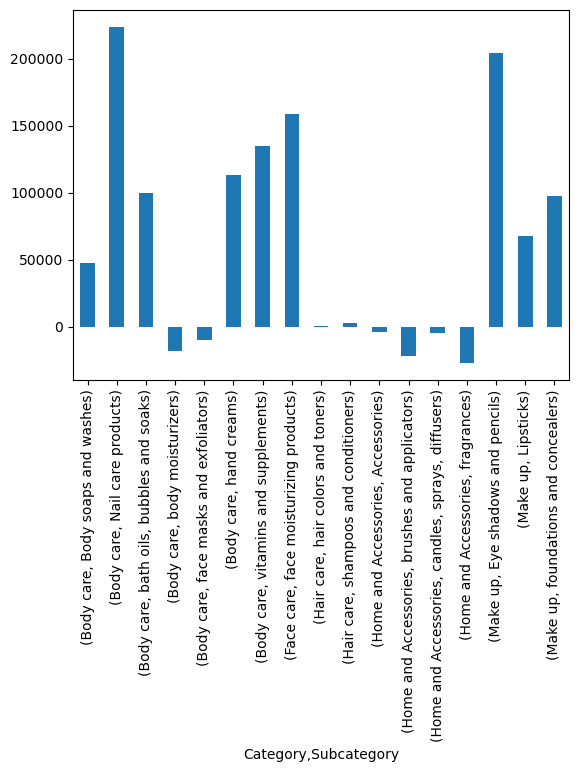

In [62]:
subcategory_profit.plot(kind='bar')

In [63]:
subcategory_discount=data.groupby(['Category','Subcategory'])['Discount'].mean()
subcategory_discount

Category              Subcategory                 
Body care             Body soaps and washes           0.169583
                      Nail care products              0.179284
                      bath oils, bubbles and soaks    0.132891
                      body moisturizers               0.137193
                      face masks and exfoliators      0.128043
                      hand creams                     0.120527
                      vitamins and supplements        0.163110
Face care             face moisturizing products      0.110109
Hair care             hair colors and toners          0.150628
                      shampoos and conditioners       0.138540
Home and Accessories  Accessories                     0.120481
                      brushes and applicators         0.145847
                      candles, sprays, diffusers      0.117147
                      fragrances                      0.290732
Make up               Eye shadows and pencils         0.117574
    

<Axes: xlabel='Category,Subcategory'>

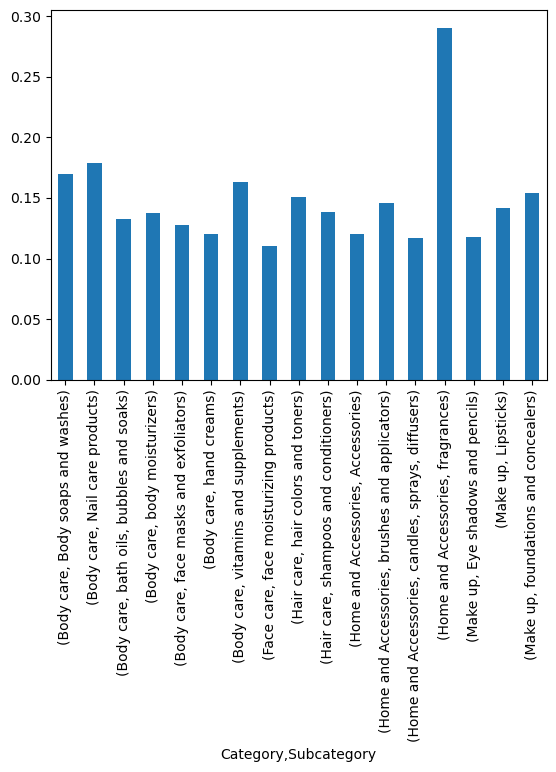

In [64]:
subcategory_discount.plot(kind='bar')

In [65]:
product_sales=data.groupby('Product')['Sales'].sum()
print(product_sales.sort_values(ascending=False).head(10))


Product
Herbal Essences Bio          67640
Rose Gold Petal Studs        29987
Sterling Wave Earrings       29520
Golden Blaze Necklace        28564
Sterling Solstice Anklet     28552
Gold Spectrum Anklet         27004
Sterling Frost Ring          26772
Silver Mirage Necklace       26226
Silver Glimmer Necklace      25088
Sterling Whisper Bracelet    24883
Name: Sales, dtype: int64


<Axes: xlabel='Product'>

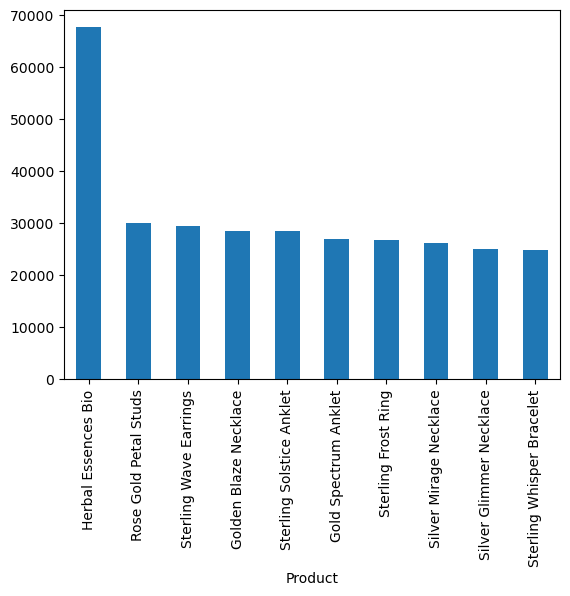

In [66]:
product_sales.sort_values(ascending=False).head(10).plot(kind='bar')

In [67]:
product_profit=data.groupby('Product')['Profit'].sum()
print(product_profit.sort_values(ascending=False).head(10))

Product
Herbal Essences Bio        9089.676
Rose Gold Petal Studs      7400.666
Sterling Frost Earrings    6071.380
Gold Spectrum Anklet       5942.764
Golden Vine Bracelet       5741.926
Sterling Wave Earrings     5583.600
Golden Feather Earrings    5508.058
Emerald Crown Necklace     5125.480
Sterling Crown Anklet      4675.650
Silver Mirage Necklace     4485.948
Name: Profit, dtype: float64


<Axes: xlabel='Product'>

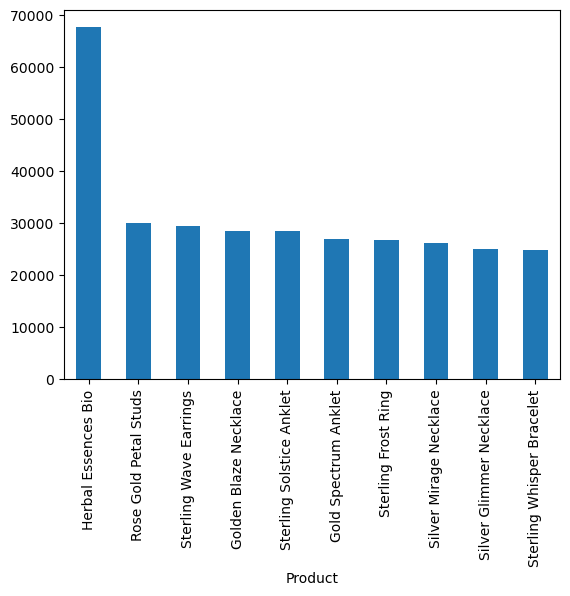

In [68]:
product_sales.sort_values(ascending=False).head(10).plot(kind='bar')

In [69]:
product_discount=data.groupby('Product')['Discount'].mean()
print(product_discount.sort_values(ascending=False).head(10))


Product
Neutrogena Clear Face Oil-Free Sunscreen SPF 50                                0.70
Kiehl's Dermatologist Solutions Powerful Strength Line-Reducing Concentrate    0.70
CeraVe Itch Relief Moisturizing Cream                                          0.70
Pantene Pro-V Nature Fusion Smoothing Conditioner                              0.70
Ruby Horizon Bracelet                                                          0.65
Dr. Teal's Soothe & Sleep Lavender Foaming Bath                                0.65
Nivea Pampering Oil with Monoi Oil & Almond Oil                                0.60
Weleda Evening Primrose Age Revitalizing Hand Cream                            0.60
Aveeno Absolutely Ageless Intensive Renewal Serum                              0.60
Golden Flora Brooch                                                            0.60
Name: Discount, dtype: float64


<Axes: xlabel='Product'>

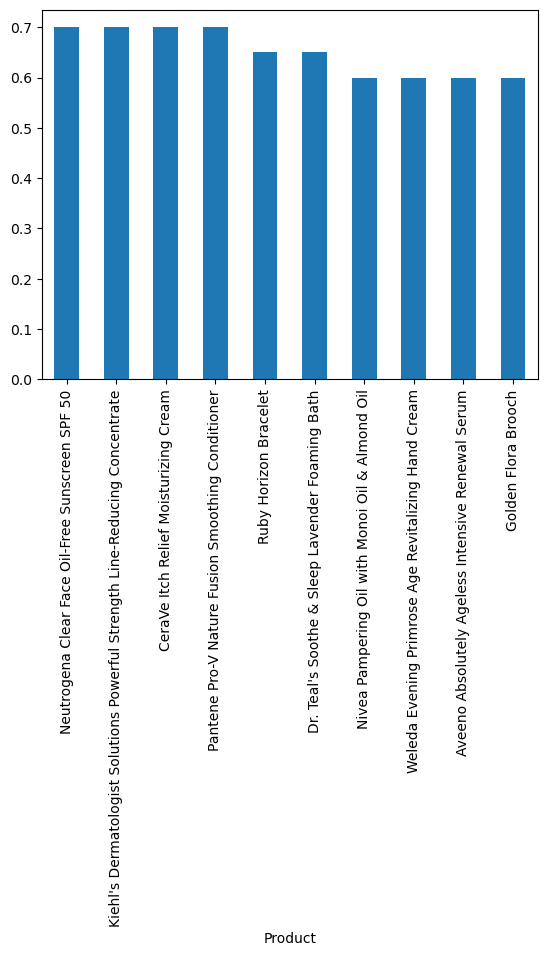

In [70]:
product_discount.sort_values(ascending=False).head(10).plot(kind='bar')

C:\Users\SHREY\AppData\Local\Temp\ipykernel_8332\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

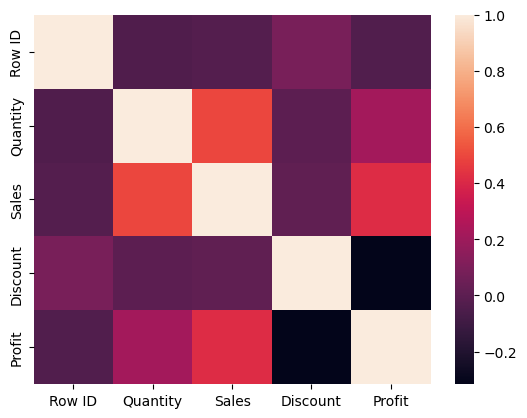

In [71]:
sns.heatmap(data.corr())

In [72]:
data_mp=data.groupby(['Market','Product'])['Profit'].sum()
print(data_mp['Africa'].sort_values(ascending=False).head(10))
print(data_mp['Asia Pacific'].sort_values(ascending=False).head(10))
print(data_mp['Europe'].sort_values(ascending=False).head(10))
print(data_mp['LATAM'].sort_values(ascending=False).head(10))
print(data_mp['USCA'].sort_values(ascending=False).head(10))

Product
Golden Feather Earrings         2292.0
Herbal Essences Bio             1751.8
Rose Gold Heartbeat Necklace    1026.0
Golden Echo Necklace             936.0
Sapphire Solstice Pendant        897.0
Burberry Chance                  858.8
Sterling Mirage Earrings         812.0
Silver Frost Bracelet            805.6
Gold Majesty Ring                795.0
Ralph Lauren Legend              686.8
Name: Profit, dtype: float64
Product
Sterling Frost Earrings      3343.90
Golden Vine Bracelet         2982.25
Sterling Crown Anklet        2918.85
Sterling Ivy Necklace        2862.00
Sterling Wave Earrings       2406.60
Golden Halo Earrings         2133.68
Sterling Whisper Bracelet    1905.47
Herbal Essences Bio          1857.44
Silver Gleam Necklace        1756.30
Silver Glimmer Necklace      1689.52
Name: Profit, dtype: float64
Product
Gold Spectrum Anklet         4286.10
Herbal Essences Bio          2954.50
Sterling Wave Earrings       2331.00
Silver Mirage Necklace       2269.20
Golden Bla

In [73]:
data['Market'].unique()

array(['Asia Pacific', 'LATAM', 'Europe', 'USCA', 'Africa'], dtype=object)

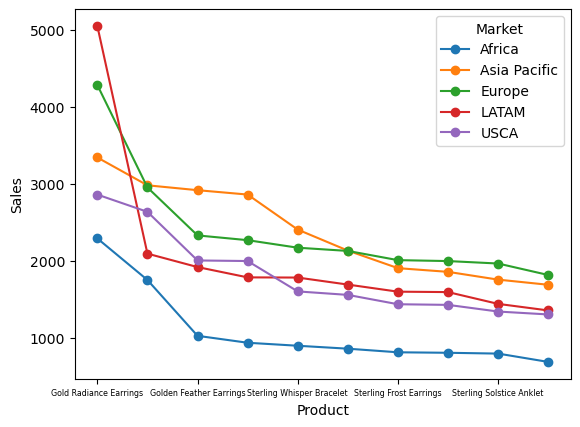

In [74]:
mp_africa=data_mp['Africa'].sort_values(ascending=False).head(10)
mp_asia_pacific=data_mp['Asia Pacific'].sort_values(ascending=False).head(10)
mp_europe=data_mp['Europe'].sort_values(ascending=False).head(10)
mp_latam=data_mp['LATAM'].sort_values(ascending=False).head(10)
mp_usca=data_mp['USCA'].sort_values(ascending=False).head(10)

mp_africa.plot(kind='line',marker='o', label='Africa')
mp_asia_pacific.plot(kind='line',marker='o', label='Asia Pacific')
mp_europe.plot(kind='line',marker='o', label='Europe')
mp_latam.plot(kind='line',marker='o', label='LATAM')
mp_usca.plot(kind='line',marker='o', label='USCA')

plt.xticks(fontsize=5.7)
plt.ylabel('Sales')
plt.legend(title='Market')

In [75]:
mp_profit=data.groupby(['Market','Product'])['Profit'].sum()
print(mp_profit['Africa'].sort_values(ascending=False).head(10))
print(mp_profit['Asia Pacific'].sort_values(ascending=False).head(10))
print(mp_profit['Europe'].sort_values(ascending=False).head(10))
print(mp_profit['LATAM'].sort_values(ascending=False).head(10))
print(mp_profit['USCA'].sort_values(ascending=False).head(10))

Product
Golden Feather Earrings         2292.0
Herbal Essences Bio             1751.8
Rose Gold Heartbeat Necklace    1026.0
Golden Echo Necklace             936.0
Sapphire Solstice Pendant        897.0
Burberry Chance                  858.8
Sterling Mirage Earrings         812.0
Silver Frost Bracelet            805.6
Gold Majesty Ring                795.0
Ralph Lauren Legend              686.8
Name: Profit, dtype: float64
Product
Sterling Frost Earrings      3343.90
Golden Vine Bracelet         2982.25
Sterling Crown Anklet        2918.85
Sterling Ivy Necklace        2862.00
Sterling Wave Earrings       2406.60
Golden Halo Earrings         2133.68
Sterling Whisper Bracelet    1905.47
Herbal Essences Bio          1857.44
Silver Gleam Necklace        1756.30
Silver Glimmer Necklace      1689.52
Name: Profit, dtype: float64
Product
Gold Spectrum Anklet         4286.10
Herbal Essences Bio          2954.50
Sterling Wave Earrings       2331.00
Silver Mirage Necklace       2269.20
Golden Bla

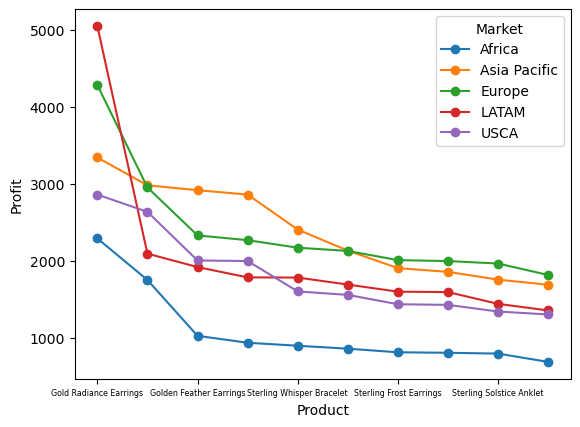

In [76]:
mp_profit_africa=mp_profit['Africa'].sort_values(ascending=False).head(10)
mp_profit_asia_pacific=mp_profit['Asia Pacific'].sort_values(ascending=False).head(10)
mp_profit_europe=mp_profit['Europe'].sort_values(ascending=False).head(10)
mp_profit_latam=mp_profit['LATAM'].sort_values(ascending=False).head(10)
mp_profit_usca=mp_profit['USCA'].sort_values(ascending=False).head(10)

mp_profit_africa.plot(kind='line',marker='o', label='Africa')
mp_profit_asia_pacific.plot(kind='line',marker='o', label='Asia Pacific')
mp_profit_europe.plot(kind='line',marker='o', label='Europe')
mp_profit_latam.plot(kind='line',marker='o', label='LATAM')
mp_profit_usca.plot(kind='line',marker='o', label='USCA')

plt.xticks(fontsize=5.7)
plt.ylabel('Profit')
plt.legend(title='Market')
